### FetchMaker

Congratulations! You’ve just started working at the hottest new tech startup, FetchMaker. FetchMaker’s mission is to match up prospective dog owners with their perfect pet. FetchMaker has been collecting data on their adoptable dogs, and it’s your job to analyze some of that data.

FetchMaker has provided us with data for a sample of dogs from their app, including the following attributes:

* *weight*, an integer representing how heavy a dog is in pounds
* *tail_length*, a float representing tail length in inches
* *age*, in years
* *color*, a String such as "brown" or "grey"
* *is_rescue*, a boolean 0 or 1

In [33]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
dogs = pd.read_csv('dog_data.csv')

In [3]:
dogs.head()

,is_rescue,weight,tail_length,age,color,likes_children,is_hypoallergenic,name,breed
0,0,6,2.25,2,black,1,0,Huey,chihuahua
1,0,4,5.36,4,black,0,0,Cherish,chihuahua
2,0,7,3.63,3,black,0,1,Becka,chihuahua
3,0,5,0.19,2,black,0,0,Addie,chihuahua
4,0,5,0.37,1,black,1,1,Beverlee,chihuahua


In [7]:
dogs.breed.unique()

array(['chihuahua', 'greyhound', 'pitbull', 'poodle', 'rottweiler',
       'shihtzu', 'terrier', 'whippet'], dtype=object)

FetchMaker estimates (based on historical data for all dogs) that 8% of dogs in their system are rescues.

They would like to know if whippets are significantly more or less likely than other dogs to be a rescue.

In [23]:
# Rescues and not resques
whippet_rescues = dogs[(dogs.is_rescue == 1) & (dogs.breed == 'whippet')]
num_whippet_rescues = len(whippet_rescues)
print("Number of resques:", num_whippet_rescues)

whippet_not_rescues = dogs[(dogs.is_rescue == 0) & (dogs.breed == 'whippet')]
num_whippet__not_rescues = len(whippet_not_rescues)
print("Number of not resques:", num_whippet__not_rescues)

num_whippets = len(dogs[dogs.breed == 'whippet'])
print(num_whippets)

whippet_rescues_pct = (num_whippet_rescues / num_whippets) *100
print("Percentage of whippets are resques:", whippet_rescues_pct)

Number of resques: 6
Number of not resques: 94
100
Percentage of whippets are resques: 6.0


Use a hypothesis test to test the following null and alternative hypotheses:

* Null: 8% of whippets are rescues
* Alternative: more or less than 8% of whippets are rescues

Using a significance threshold of 0.05, Is the proportion of whippets who are rescues significantly different from 8%?

In [25]:
# Binomial Test
from scipy.stats import binom_test
p_value = binom_test(num_whippet_rescues, n=num_whippets, p =0.08)
print("Binomial test P-value:", p_value)
print("Since our p-value is more than 0.05 threshold it means that we can accept null hypothesis and say that statistical difference is not significant and therefore about 8% of whippets are resques.")

Binomial test P-value: 0.5811780106238105
Since our p-value is more than 0.05 threshold it means that we can accept null hypothesis and say that statistical difference is not significant and therefore about 8% of whippets are resques.


#### Mid-Sized Dog Weights

Three of FetchMaker’s most popular mid-sized dog breeds are 'whippet's, 'terrier's, and 'pitbull's. Is there a significant difference in the average weights of these three dog breeds?


Run a single hypothesis test to address the following null and alternative hypotheses:

* Null: whippets, terriers, and pitbulls all weigh the same amount on average
* Alternative: whippets, terriers, and pitbulls do not all weigh the same amount on average (at least one pair of breeds has differing average weights)

Using a significance threshold of 0.05, is there at least one pair of dog breeds that have significantly different average weights?

In [28]:
wt_whippets = dogs[dogs.breed == 'whippet'].weight
wt_terriers = dogs[dogs.breed == 'terrier'].weight
wt_pitbulls = dogs[dogs.breed == 'pitbull'].weight

P-value: 3.276415588274815e-17
Since p-value is less than 0.05 threshold it means at least one pair of dog breeds have significantly different average weights.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
pitbull terrier   -13.24  0.001 -16.728 -9.752   True
pitbull whippet    -3.34 0.0639  -6.828  0.148  False
terrier whippet      9.9  0.001   6.412 13.388   True
-----------------------------------------------------
Null hypothesys is rejected for Pitbull/Terrier and Whippet/Terrier pairs. Those pairs have significantly different average weights.


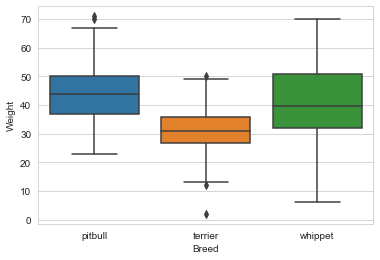

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<Figure size 432x288 with 0 Axes>

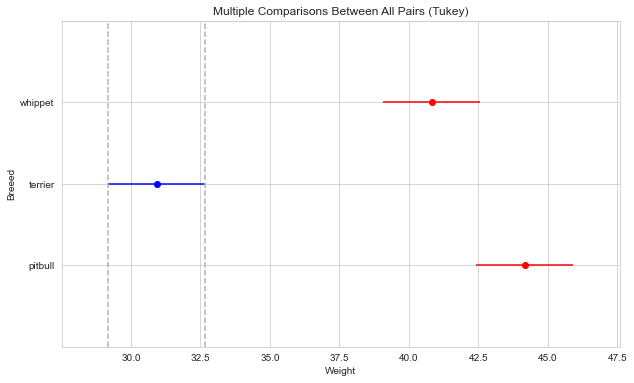

On the chart above the dot is the mean value and intervals are 95% confidence interval between breeds. Terrier intervals doesn't overlap which tells us that terrier weights are significantly different from others.


<Figure size 432x288 with 0 Axes>

In [64]:
#7,8 ANOVA/Tukey test
from scipy.stats import f_oneway
fstat, pval_anova = f_oneway(wt_whippets, wt_terriers, wt_pitbulls)
print("P-value:", pval_anova)
print("Since p-value is less than 0.05 threshold it means at least one pair of dog breeds have significantly different average weights.")

# Subset to just whippets, terriers, and pitbulls
dogs_wtp = dogs[dogs.breed.isin(['whippet', 'terrier', 'pitbull'])]

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(dogs_wtp.weight, dogs_wtp.breed, 0.05)
print(tukey_results)
print("Null hypothesys is rejected for Pitbull/Terrier and Whippet/Terrier pairs. Those pairs have significantly different average weights.")

# Visualization of breed weights
sns.set_style("whitegrid")
sns.boxplot(data=dogs_wtp, y='weight', x='breed')
plt.xlabel("Breed")
plt.ylabel("Weight")
plt.show()
plt.clf()

# Built in Tukey visualization function
tukey_results.plot_simultaneous(comparison_name = 'terrier',xlabel='Weight', ylabel='Breeed')
plt.show()
plt.clf()

print("On the chart above the dot is the mean value and intervals are 95% confidence interval between breeds. Terrier intervals doesn't overlap which tells us that terrier weights are significantly different from others.")

#### Poodle and Shihtzu Colors

FetchMaker wants to know if 'poodle's and 'shihtzu's come in different colors. 

Run a hypothesis test for the following null and alternative hypotheses:

* Null: There is not an association between breed (poodle vs. shihtzu) and color.
* Alternative: There is an association between breed (poodle vs. shihtzu) and color.

Do poodles and shihtzus come in significantly different color combinations? Use a significance threshold of 0.05.

In [61]:
# Subset to just poodles and shihtzus
dogs_ps = dogs[dogs.breed.isin(['poodle', 'shihtzu'])]

# Contingency table creation (color by breed)
Xtab = pd.crosstab(dogs_ps.breed, dogs_ps.color)
print(Xtab)

# Chi-Square Test
from scipy.stats import chi2_contingency
chi2, pval_chi, dof, expected = chi2_contingency(Xtab)
print("P-value:", pval_chi)
print("Since our p-value is less than 0.05 threshold we can reject null hypothesis and say that there is an association between which breed (poodle vs. shihtzu) and their color.")

color    black  brown  gold  grey  white
breed                                   
poodle      17     13     8    52     10
shihtzu     10     36     6    41      7
P-value: 0.005302408293244597
Since our p-value is less than 0.05 threshold we can reject null hypothesis and say that there is an association between which breed (poodle vs. shihtzu) and their color.
